## Computation ACME-Pandas 
### 10. Conditioning and Stability


* #### August 2, 2019
* #### SP Tian 

In [1]:
# Import packages and set up 

import numpy as np 
from scipy import linalg as la 
import sympy as sy
import scipy as sp
from matplotlib import pyplot as plt 
%matplotlib inline 


### Problem 1 

In [2]:
def condition_num(A): 
    singular = np.max(la.svd(A)[1])/np.min(la.svd(A)[1])
    if np.min(la.svd(A)[1]) == 0: 
        singular = np.inf()
        
    # OR: 
    #np.abs(np.min(la.svd(A)[1]) - 0) > 1e-6 as the if condition 
    return singular 


In [3]:
# Compare and validate my function 
A = np.array([[1, 1], [1, 1+1e-10]])
A

array([[1., 1.],
       [1., 1.]])

In [4]:
np.linalg.cond(A)

39999991794.0589

In [5]:
condition_num(A)

39999991794.05891

In [7]:
condition_num(la.qr(A)[0])

1.0000000000000002

### Exercise 2

In [8]:
x, i = sy.symbols("x i")
w = sy.poly_from_expr(sy.product(x - i, (i, 1, 20)))[0]
# Get Wilkinson polynomial coefficients
w_coeffs = np.array(w.all_coeffs())
w_coeffs[:6]

array([1, -210, 20615, -1256850, 53327946, -1672280820], dtype=object)

In [9]:
# Perturb one of the coefficients 
h = np.zeros(21)
h[1] = 1e-7
new_coeffs = w_coeffs - h
new_coeffs[:6]

array([1, -210.000000100000, 20615, -1256850, 53327946, -1672280820],
      dtype=object)

In [10]:
# Use NumPy to compute the roots of the perturbed polynomial. 
new_roots = np.roots(np.poly1d(new_coeffs))
new_roots

array([20.78883005+0.j        , 19.4596845 +1.87437534j,
       19.4596845 -1.87437534j, 16.72515555+2.73162478j,
       16.72515555-2.73162478j, 14.01136772+2.44967422j,
       14.01136772-2.44967422j, 11.82164427+1.59965229j,
       11.82164427-1.59965229j, 10.12126327+0.60484685j,
       10.12126327-0.60484685j,  8.92663152+0.j        ,
        8.00662322+0.j        ,  6.99967203+0.j        ,
        6.0000132 +0.j        ,  4.99999945+0.j        ,
        4.00000002+0.j        ,  3.        +0.j        ,
        2.        +0.j        ,  1.        +0.j        ])

In [11]:
w_roots = np.arange(1, 21)
w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)

# Estimate the absolute condition number in the infinity norm 
k = la.norm(new_roots - w_roots, np.inf)/(la.norm(h, np.inf))
print("Absolute condition: ", k)

# Estimate the relative condition number in the infinity norm 
print("Relative condition: ", 
     k*la.norm(w_coeffs, np.inf)/la.norm(w_roots, np.inf))

Absolute condition:  28262385.815815903
Relative condition:  1.95063591933113e+25


### Problem 2

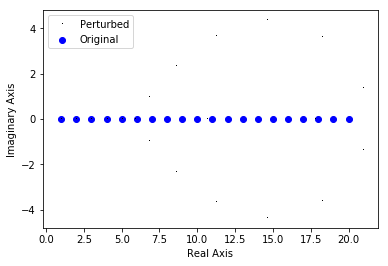

(43910374.48486403, 3.03064130040729e+25)

In [12]:
def expHundred(N = 100): 
    c, r = sy.symbols("c r")
    r = np.random.normal(1, 1e-10, 21)
    
    im = []
    re = []
    abs_list = []
    rela_list = []
    
    for i in range(N):
        np.random.seed(i*10000000)
        
    for i in range(21):
        new_coeffs[i] = w_coeffs[i] * r[i]

    new_roots = np.roots(np.poly1d(new_coeffs))
    new_roots = np.sort(new_roots)
    # Compute the condition number using NumPy package 
    # w diff to Scipy package 
    k = la.norm(new_roots - w_roots, np.inf)/la.norm(h, np.inf)
    rela_k = k*la.norm(w_coeffs, np.inf)/la.norm(w_roots, np.inf)

    abs_list.append(k)
    rela_list.append(rela_k)

    # take the im part and re part
    for root in new_roots:
        im.append(root.imag)
        re.append(root.real)
    plt.plot(re, im, 'k,', label = 'Perturbed')
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.scatter(w_roots, np.zeros(20), color = 'blue', label = 'Original')
    plt.legend()
    plt.show()
    
    absolute_k = np.mean(abs_list)
    relative_k = np.mean(rela_list)
    
    return absolute_k, relative_k 

expHundred()

### Problem 3

In [13]:
def eigenvalue(A): 
    # perturbation H 
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags 
    perturb_A = A + H
    
    λ = la.eigvals(A)
    perturb_λ = la.eigvals(perturb_A)
    
    result = np.linalg.norm(λ - perturb_λ, 2)/np.linalg.norm(H,2)
    rela_result = np.linalg.norm(A, 2)/np.linalg.norm(λ, 2)*result
    
    return result, rela_result

eigenvalue(A)

(0.7390339821278193, 0.7390339821278192)

### Problem 4

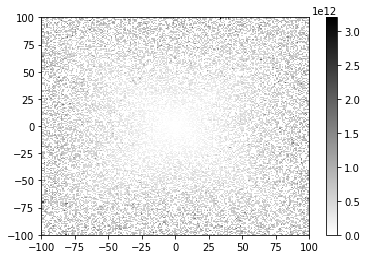

In [14]:
def eigenvalue_bound(xmin, xmax, ymin, ymax, res): 
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    bound = np.zeros((res, res))
    
    for i in range(res):
        for j in range(res):
            A = np.array([[1, x[i]], [y[j], 1]])
            bound[i, j] = eigenvalue(A)[1]
    
    xx, yy = np.meshgrid(x, y)   
    plt.pcolormesh(xx, yy, bound, cmap = 'gray_r')
    plt.colorbar()
    plt.show()
    
eigenvalue_bound(-100, 100, -100, 100, 200)

### Exercise 5

In [15]:
computed_roots = np.sort(np.roots(np.poly1d(w_coeffs)))
computed_roots[:6]

array([1.        , 2.        , 3.        , 3.99999998, 5.00000067,
       5.99998925])

In [16]:
forward_error = la.norm(w_roots - computed_roots)
forward_error

0.1581635111073643

In [17]:
forward_error/la.norm(w_roots)

0.0029523330552163516

### Problem 5

In [18]:
def stability(n): 
    xk, yk = np.load("stability_data.npy").T 
    A = np.vander(xk, n + 1)
    AT = A.T
    
    # Inverse, intuitive but highly unstable with large forward error 
    coeff1 = la.inv(AT @ A) @ AT @ yk 
    
    # QR, stable 
    Q, R = la.qr(A, mode = "economic")
    coeff2 = la.solve_triangular(R, Q.T.dot(yk))
    
    xx = np.linspace(0, 1, 100)
    inv = np.polyval(coeff1, xx)
    qr = np.polyval(coeff2, xx)
    plt.plot(xx, inv, label = 'Normal Equations')
    plt.plot(xx, qr, label = 'QR/Qx Solver')
    plt.scatter(xk, yk, marker = '*', s = 2, label = 'Data')
    plt.legend()
    plt.show()
    
    forward_error_inv = la.norm(A @ coeff1 - yk, 2)
    forward_error_qr = la.norm(A @ coeff2 - yk, 2)
    return (forward_error_inv, forward_error_qr)


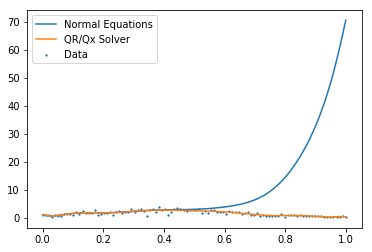

(182.47535246459793, 4.593389524171301)

In [19]:
stability(13)

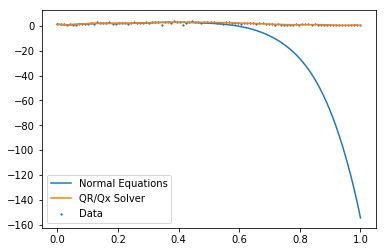

(396.94219827796326, 4.568370941902039)

In [20]:
stability(14)

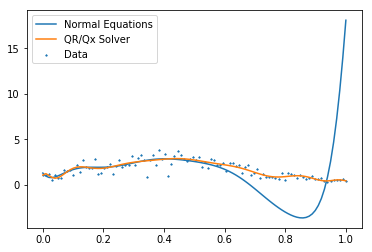

(31.201027095569668, 4.527556122356962)

In [21]:
stability(15)

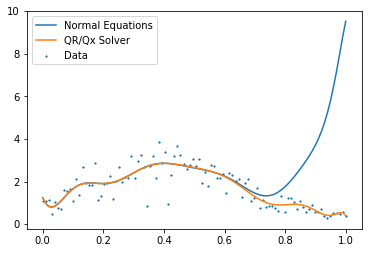

(21.105759497913752, 4.593408026933323)

In [22]:
stability(12)

### Problem 6 

Let $I(n) = \int^1_0{x^ne^{x-1}dx}$. It can be shown that for a positive integer $n$,

where $!n = n!\Sigma^n_{k=0}\dfrac{(-1)^k}{k!}$ is the **subfactorial of n**. Write a function to do the following.

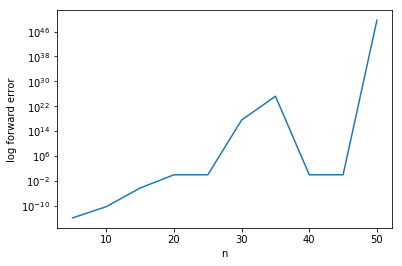

In [23]:
def true_integral(n): 
    x = sy.symbols("x")
    integral = sy.integrate((x**n * sy.exp(x - 1)), (x, 0, 1))
    return integral

def approx_integral(n): 
    subfac = sy.subfactorial(n)
    fac = sy.factorial(n)
    integral = (-1)**n * subfac + (-1)**(n + 1) * fac/np.exp(1) 
    # Why here using np.exp can be plotted but cannot using sy.exp
    return integral

def plot_forward(): 
    n = np.arange(5, 51, 5)
    lerror = []

    for i in range(10):
        true = true_integral(n[i])
        approx = approx_integral(n[i])
        error = np.abs(true - approx) / np.abs(true)
        lerror.append(error)
        
    plt.plot(n, lerror)
    plt.yscale('log')
    plt.ylabel('log forward error')
    plt.xlabel('n')
    plt.show()

plot_forward()